In [17]:
print(data.columns)

Index(['ph', 'Hardness', 'Solids', 'Conductivity', 'Turbidity', 'Potability'], dtype='object')


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

# Load the dataset (replace 'water_quality_data.csv' with the actual path to your file)
data = pd.read_csv(r'C:\Users\ASUS\Desktop\At Tumkur\water_potability  CE.csv')

# Inspect the dataset
print(data.head())
print(data.columns)

         ph    Hardness       Solids  Conductivity  Turbidity  Potability
0       NaN  204.890456  20791.31898    564.308654   2.963135           0
1  3.716080  129.422921  18630.05786    592.885359   4.500656           0
2  8.099124  224.236259  19909.54173    418.606213   3.055934           0
3  8.316766  214.373394  22018.41744    363.266516   4.628771           0
4  9.092223  181.101509  17978.98634    398.410813   4.075075           0
Index(['ph', 'Hardness', 'Solids', 'Conductivity', 'Turbidity', 'Potability'], dtype='object')


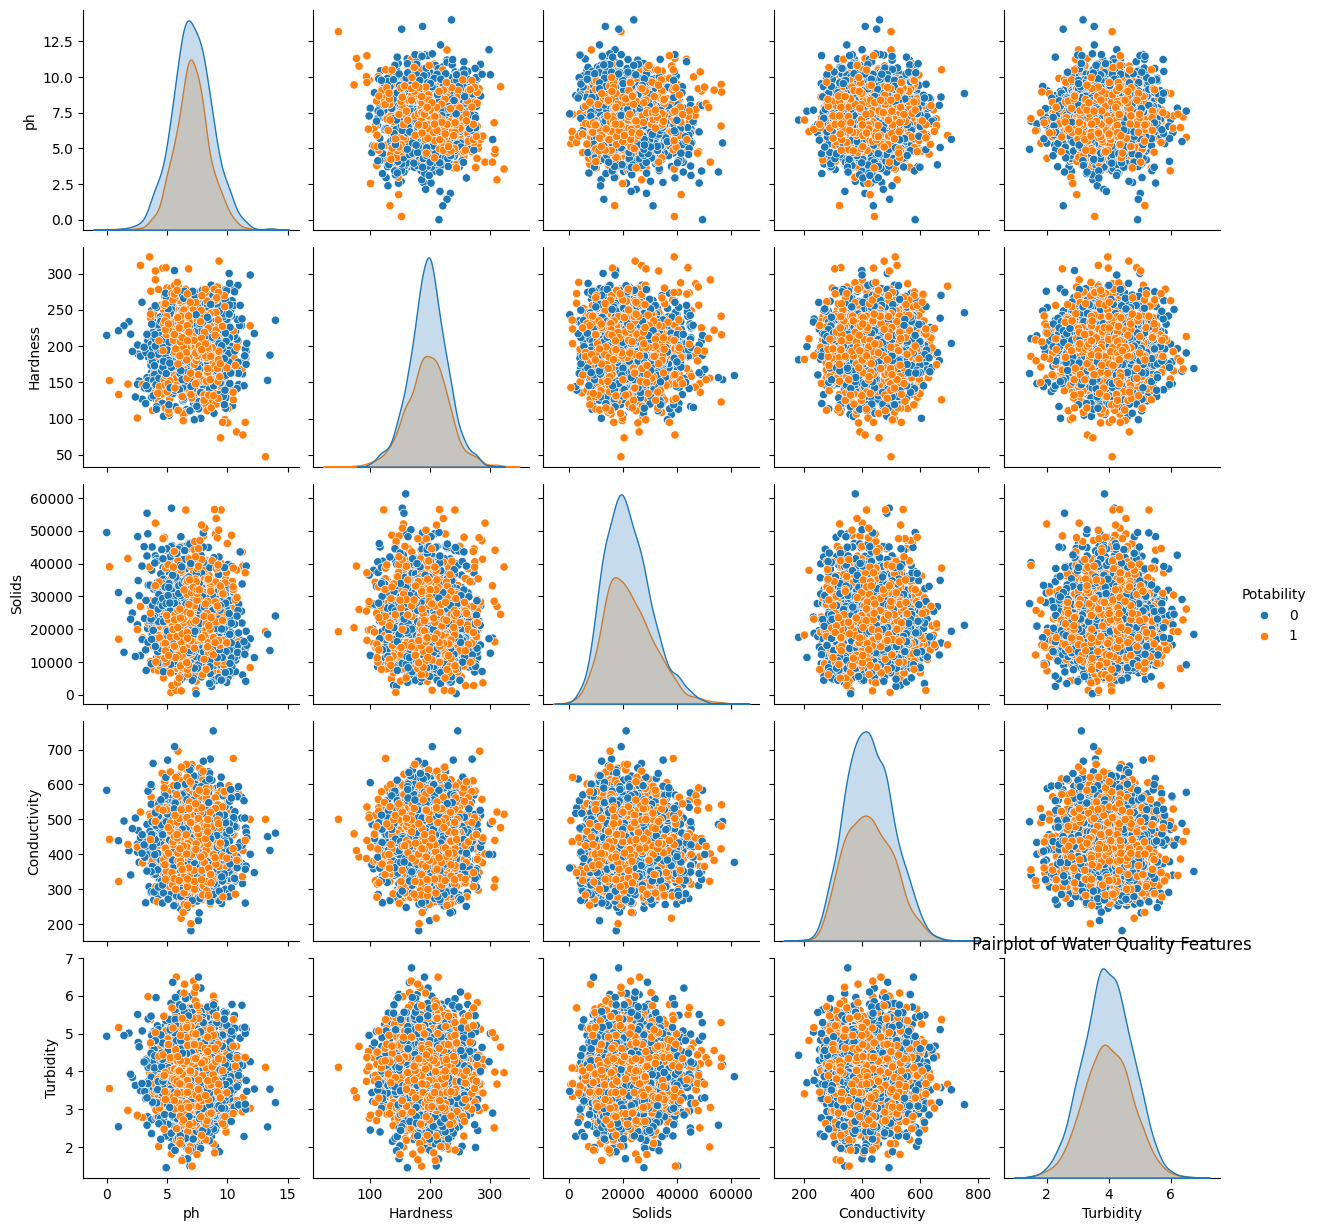

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(data, hue='Potability')
plt.title('Pairplot of Water Quality Features')
plt.show()


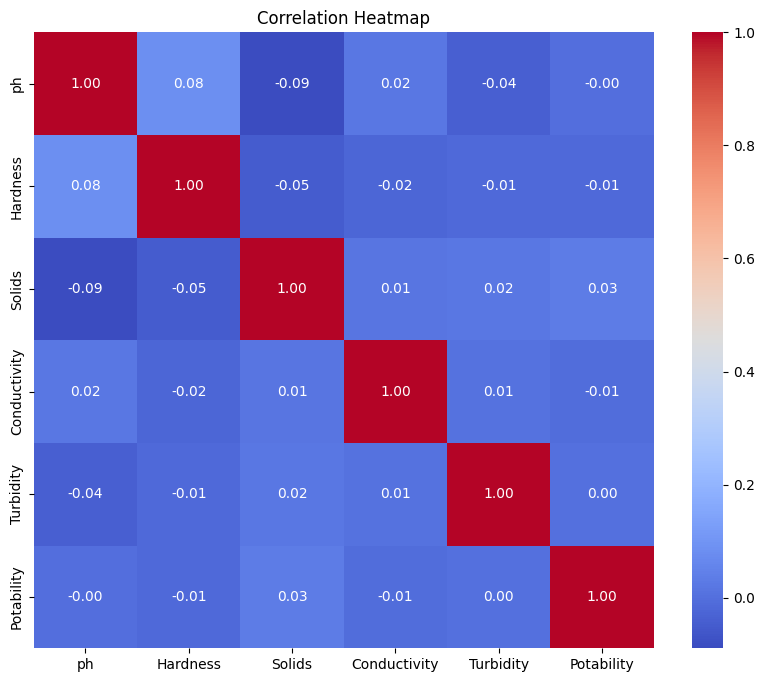

In [4]:
# Correlation matrix
corr = data.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


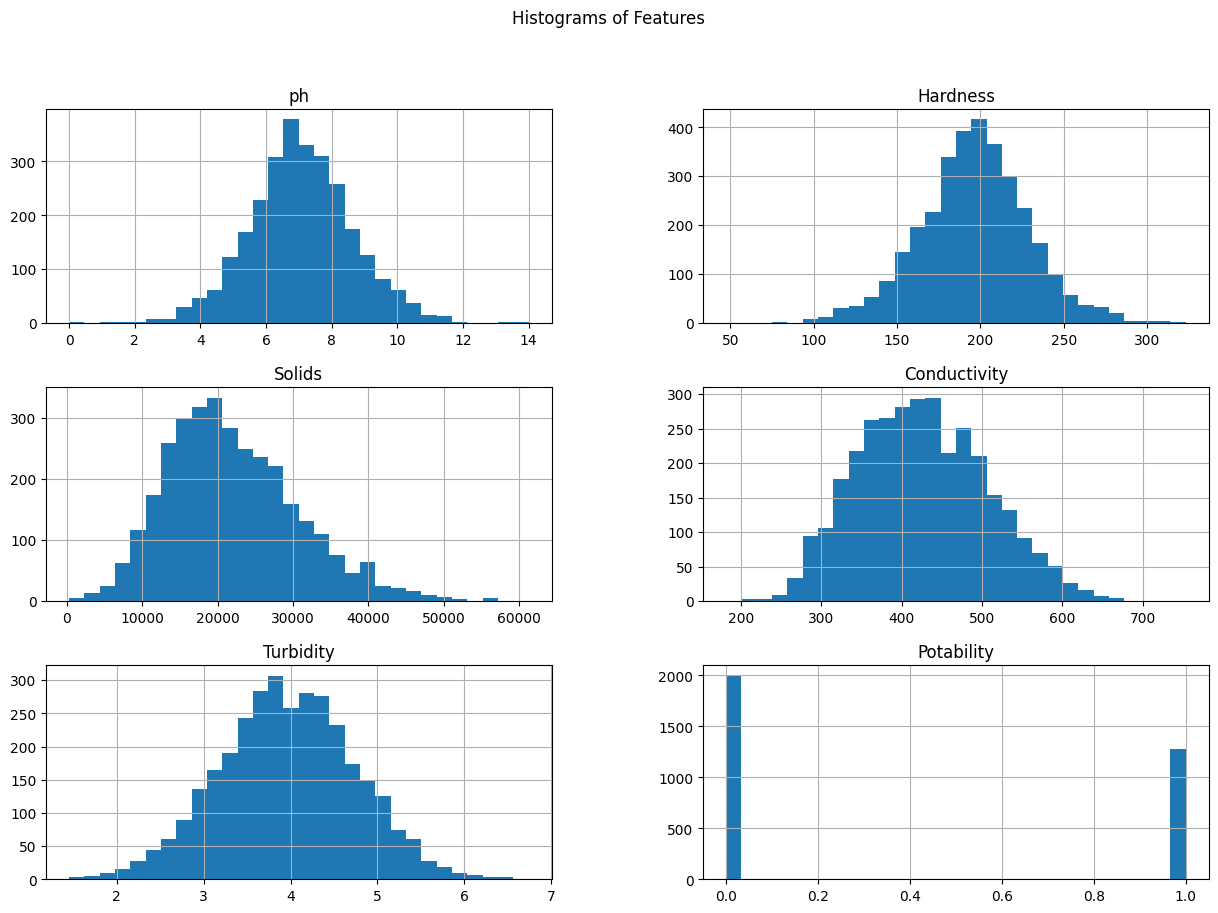

In [5]:
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()


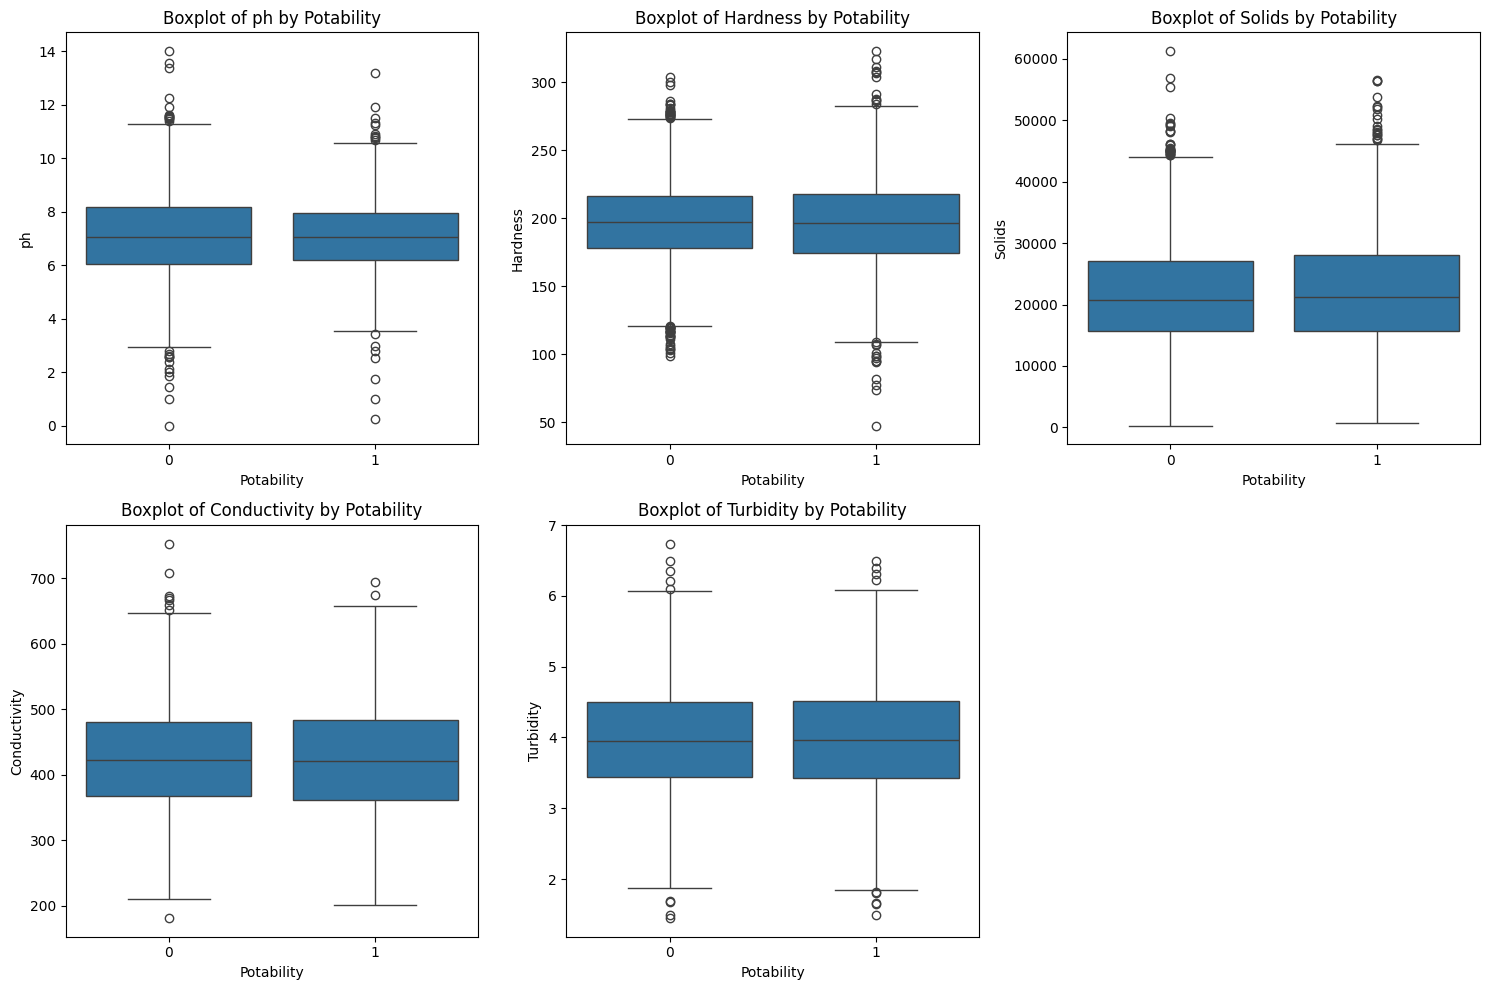

In [6]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Potability', y=column, data=data)
    plt.title(f'Boxplot of {column} by Potability')
plt.tight_layout()
plt.show()


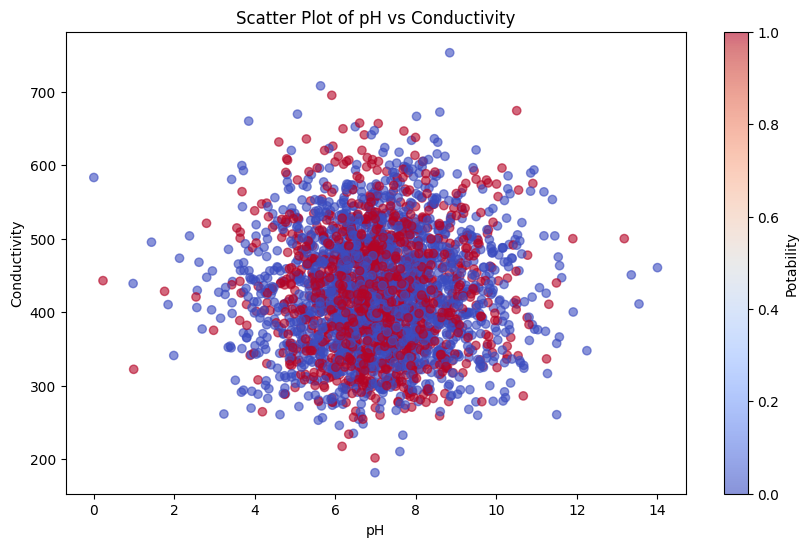

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(data['ph'], data['Conductivity'], c=data['Potability'], cmap='coolwarm', alpha=0.6)
plt.title('Scatter Plot of pH vs Conductivity')
plt.xlabel('pH')
plt.ylabel('Conductivity')
plt.colorbar(label='Potability')
plt.show()


In [18]:
# Data Preprocessing
# Features: 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 
# 'Organic_carbon', 'Trihalomethanes', 'Turbidity'
# Target: 'Potability' (1 for safe, 0 for unsafe)

# Features and target variable
X = data[['ph', 'Hardness', 'Solids','Conductivity','Turbidity']]
y = data['Potability']

# Handling missing data (if any)
X = X.fillna(X.mean())

In [19]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Feature scaling (SVM performs better with scaled features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
svm_classifier.fit(X_train_scaled, y_train)

SVC()

In [21]:
# Make predictions
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print(f"F1 Score: {f1:.2f}")


Accuracy: 62.96%
Confusion Matrix:
 [[392  20]
 [223  21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.95      0.76       412
           1       0.51      0.09      0.15       244

    accuracy                           0.63       656
   macro avg       0.57      0.52      0.46       656
weighted avg       0.59      0.63      0.53       656

F1 Score: 0.15


In [22]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

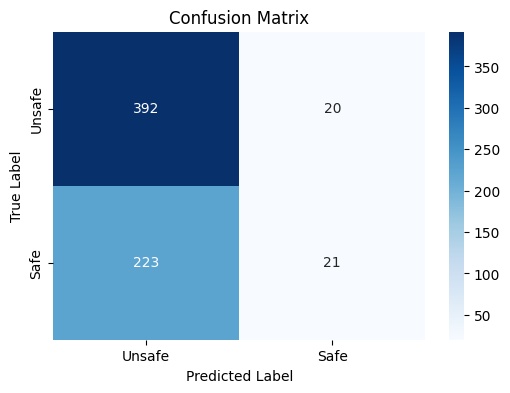

In [23]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Unsafe', 'Safe'], yticklabels=['Unsafe', 'Safe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()